In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving porygon.jpg to porygon (1).jpg


In [ ]:
!pwd
!ls

/content
 gdrive  'porygon (1).jpg'   porygon.jpg   sample_data


In [ ]:
# %cd /content/gdrive/My\ Drive
%cd
!git clone https://github.com/ageitgey/face_recognition.git
!ls face_recognition/

/root
fatal: destination path 'face_recognition' already exists and is not an empty directory.
AUTHORS.rst	    HISTORY.rst		README_Simplified_Chinese.md
CONTRIBUTING.rst    LICENSE		requirements_dev.txt
docker		    Makefile		requirements_docs.txt
docker-compose.yml  MANIFEST.in		requirements.txt
Dockerfile	    pyproject.toml	setup.cfg
Dockerfile.gpu	    README_Japanese.md	setup.py
docs		    README_Korean.md	tests
examples	    README.md		tox.ini
face_recognition    README.rst


In [ ]:
!pip install numpy pandas opencv-python face-recognition

In [ ]:
!ls face_recognition/examples/knn_examples/test

alex_lacamoire1.jpg  kit_with_rose.jpg	obama_and_biden.jpg
johnsnow_test1.jpg   obama1.jpg


In [ ]:
import cv2
import face_recognition
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (8, 8)

In [ ]:
!ls

face_recognition


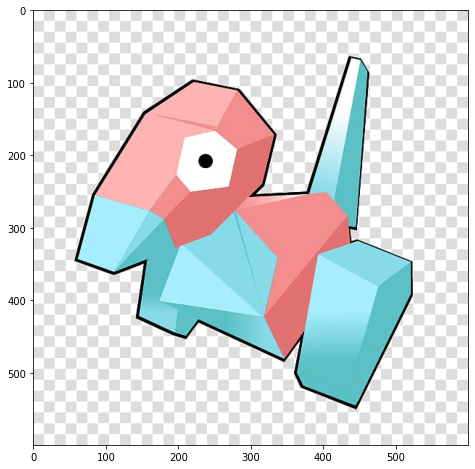

In [ ]:
# img = cv2.imread('face_recognition/examples/knn_examples/test/johnsnow_test1.jpg')
img = cv2.imread('/content/porygon.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
print(img.shape)
print(img.dtype)
print(type(img))

(600, 600, 3)
uint8
<class 'numpy.ndarray'>


In [ ]:
img[:3, :3]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)

In [ ]:
img[200, 200]

array([180, 177, 255], dtype=uint8)

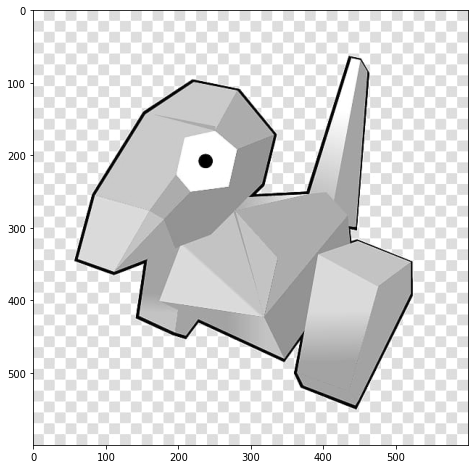

In [ ]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap='gray')

In [ ]:
img_gray[:3, :3]

array([[255, 255, 255],
       [255, 255, 255],
       [255, 255, 255]], dtype=uint8)

In [ ]:
img_gray[200, 200]

201

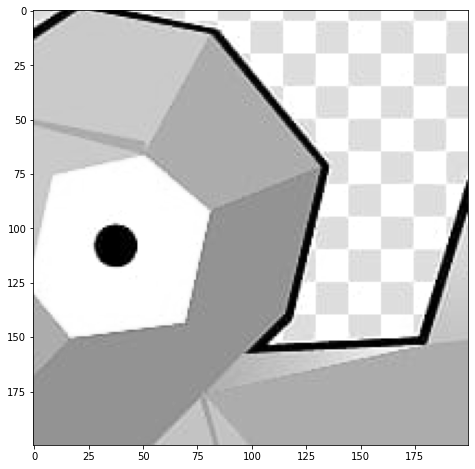

In [ ]:
plt.imshow(img_gray[100:300, 200:400], cmap='gray')

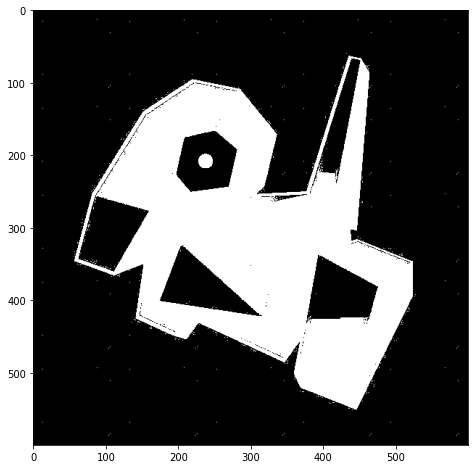

In [ ]:
img_zero = np.zeros((600, 600), dtype=np.uint8) # char
img_zero[img_gray > 210] = 255
img_src = 255 - img_zero
plt.imshow(img_src, cmap='gray')

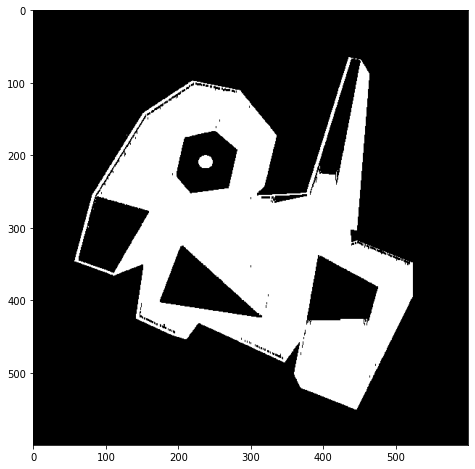

In [ ]:
img_erode = cv2.erode(img_src, (10, 10))
img_erode = cv2.erode(img_erode, (10, 10))
plt.imshow(img_erode, cmap='gray')

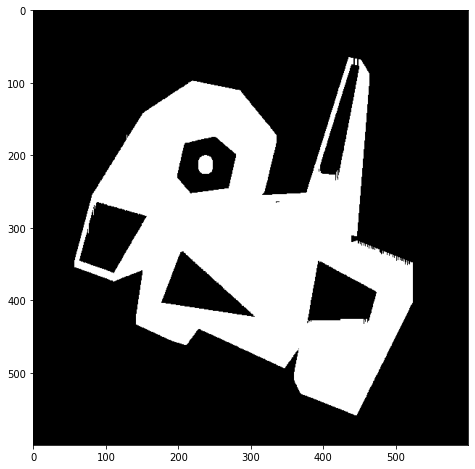

In [ ]:
img_dil = cv2.dilate(img_erode, (10, 10), iterations=8)
# img_dil = cv2.dilate(img_dil, (10, 10))

plt.imshow(img_dil, cmap='gray')

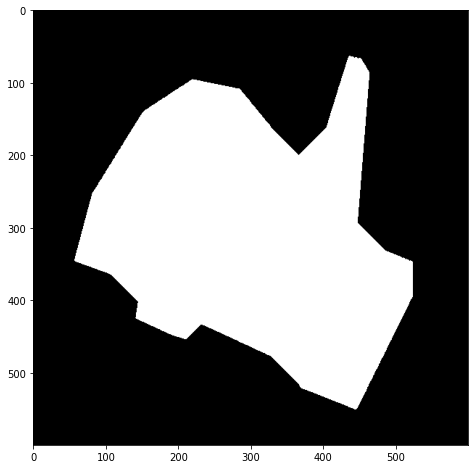

In [ ]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
img_morph = cv2.morphologyEx(img_src, cv2.MORPH_OPEN, kernel, iterations=1)
img_morph = cv2.morphologyEx(img_morph, cv2.MORPH_CLOSE, kernel, iterations=37)

plt.imshow(img_morph, cmap='gray')

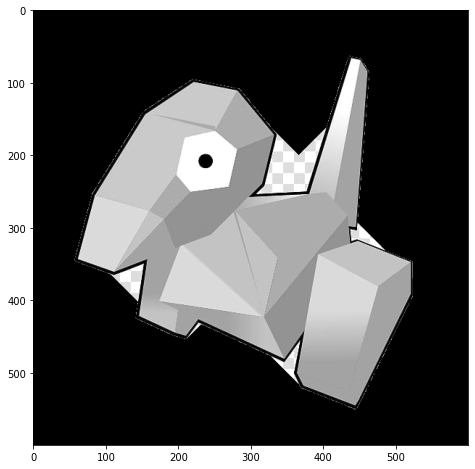

In [ ]:
img_threshold = np.zeros_like(img_gray)
# img_threshold[img_morph == 255] = img_gray
img_threshold = np.where(img_morph == 255, img_gray, 0)

plt.imshow(img_threshold, cmap='gray')


In [ ]:
1200 * 0.04 / 12

4.0